In [59]:
import os
import sys

import numpy as np
import pylab as pl

%matplotlib inline

In [60]:
# pl.rcParams['savefig.dpi'] = 300
pl.style.use('fabiostyle')

# import pandas

sys.path.append('../../../../code/')  # to be replaced!
import utils as ut
import plots as pt

In [61]:
NOTEBOOK_NAME = 'breath_cells'

In [62]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [63]:
from scipy import stats as sstats

In [64]:
for var in ('events', 'time_ax', 'cycles', 'CYCLE_START', 'CS_DURATION',
            'STIM1_ons','STIM2_ons','STIM3_ons','STIM4_ons','is_STIM1t','is_STIM2t','is_STIM3t','is_STIM4t'):
    exec("%s = ut.load_variable('%s', '../notebooks/autorestore/preprocessing')"%(var, var))
for var in 'resp_rate',:
    exec("%s = ut.load_variable('%s', '../notebooks/autorestore/breathing/')"%(var, var))

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, LeaveOneGroupOut
from sklearn.metrics import r2_score

In [66]:
lr = LinearRegression()

In [67]:
import pandas as pd

In [68]:
cv = LeaveOneGroupOut()
n_chunks = 10
groups = np.repeat(np.arange(n_chunks), len(events)/n_chunks+1)[:len(events)]

In [69]:
y_preds = lr.fit(events, resp_rate).predict(events)
y_preds_cv = cross_val_predict(lr, events, resp_rate, cv=cv.split(events, resp_rate, groups=groups))
scores = cross_val_score(lr, events, resp_rate, cv=cv.split(events, resp_rate, groups=groups))

bool_filter = np.r_[[False]*len(time_ax)]
for s, e in cycles:
    bool_filter[(time_ax>=s-CYCLE_START) * (time_ax>=s-CYCLE_START+CS_DURATION)] = True
score = r2_score(resp_rate[bool_filter], y_preds_cv[bool_filter])

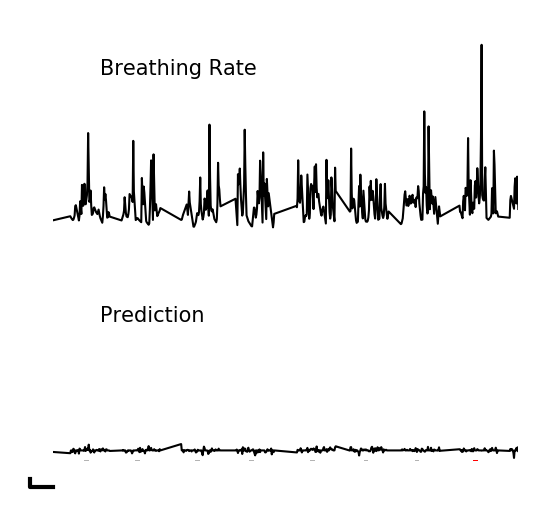

In [70]:
fig, axs = pl.subplots(2, 1, figsize=(2, 2), sharex=True, sharey=True)
axs[0].plot(time_ax, resp_rate, lw=0.5, color='k')
axs[1].plot(time_ax, y_preds, lw=0.5, color='k')
axs[0].set_xlim(600, 800)
# axs[1].set_ylim(2, 6)

for i, (s, e) in zip(is_STIM3t, cycles):
    pt.plot_period_bar(axs[1], 2.5, color='r' if i else '0.7', delta_y=0.1, start_end=(s-CYCLE_START, s-CYCLE_START+CS_DURATION))

for ax in axs:
    pt.remove_axes(ax)
    
pt.draw_scale_line_xy(axs[1], (10, 1), offset=(-10, -0.05), lw=1)

axs[0].text(0.1, 0.8, 'Breathing Rate', transform=axs[0].transAxes)
axs[1].text(0.1, 0.8, 'Prediction', transform=axs[1].transAxes)

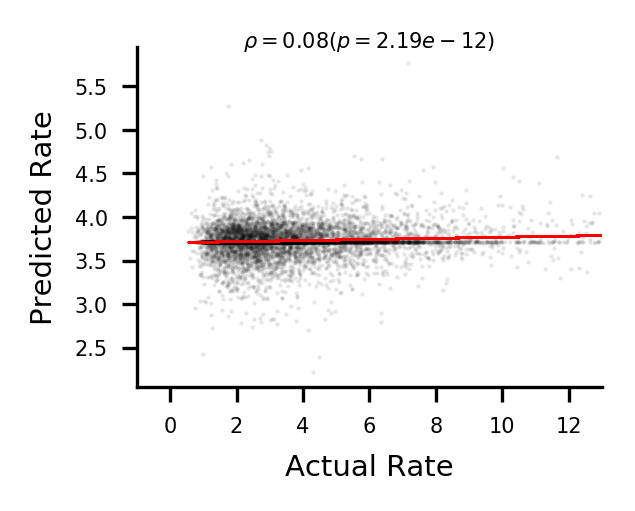

In [71]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1.5))
ax.plot(resp_rate, y_preds, 'ko', ms=1, mew=0, alpha=0.1)
ax.plot(resp_rate, lr.fit(resp_rate.reshape([-1, 1]), y_preds).predict(resp_rate.reshape([-1, 1])), 'r-', lw=0.5)
pt.nicer_plot(ax)
ax.set_xlim(-1, 13)
# ax.set_ylim(2, 5)

ax.set_xlabel('Actual Rate')
ax.set_ylabel('Predicted Rate')

p = sstats.pearsonr(resp_rate, y_preds)

ax.text(0.5, 1, r"$\rho=%.2lf (p=%.2e)$"%p, ha='center', transform=ax.transAxes)

In [72]:
save_workspace(db)

Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pd'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
